In [2]:
# Importing some essential library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Importing warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Uploading the dataset
df=pd.read_csv('/content/drive/MyDrive/customer-data.csv')

In [4]:
#  No. of Rows and No. of columns
print("No. of rows = ", df.shape[0])
print("No. of columns = ", df.shape[1])

No. of rows =  10000
No. of columns =  19


In [5]:
#  Information about data types of each column
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   10000 non-null  int64  
 1   age                  10000 non-null  object 
 2   gender               10000 non-null  object 
 3   race                 10000 non-null  object 
 4   driving_experience   10000 non-null  object 
 5   education            10000 non-null  object 
 6   income               10000 non-null  object 
 7   credit_score         9018 non-null   float64
 8   vehicle_ownership    10000 non-null  bool   
 9   vehicle_year         10000 non-null  object 
 10  married              10000 non-null  bool   
 11  children             10000 non-null  bool   
 12  postal_code          10000 non-null  int64  
 13  annual_mileage       9043 non-null   float64
 14  vehicle_type         10000 non-null  object 
 15  speeding_violations  10000 non-null  

In [6]:
# to change use .astype() 
df['vehicle_ownership'] = df.vehicle_ownership.astype(int)

In [7]:
# to change use .astype() 
df['married'] = df.married.astype(int)

In [8]:
# to change use .astype() 
df['children'] = df.children.astype(int)

In [9]:
# to change use .astype() 
df['outcome'] = df.outcome.astype(int)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   10000 non-null  int64  
 1   age                  10000 non-null  object 
 2   gender               10000 non-null  object 
 3   race                 10000 non-null  object 
 4   driving_experience   10000 non-null  object 
 5   education            10000 non-null  object 
 6   income               10000 non-null  object 
 7   credit_score         9018 non-null   float64
 8   vehicle_ownership    10000 non-null  int64  
 9   vehicle_year         10000 non-null  object 
 10  married              10000 non-null  int64  
 11  children             10000 non-null  int64  
 12  postal_code          10000 non-null  int64  
 13  annual_mileage       9043 non-null   float64
 14  vehicle_type         10000 non-null  object 
 15  speeding_violations  10000 non-null  

In [11]:
# Columns having missing values
print('Columns having missing values are as follows:')
for i in df.isnull().any().index:
    if (df.isnull().any()[i]):
        print(i)

Columns having missing values are as follows:
credit_score
annual_mileage


In [12]:
#  Number of missing values and their percentage in each column
print("Number of missing values in each column:")
print(df.isnull().sum())
print('\nPercentage of missing values in each column:')
print(round(100*df.isnull().sum()/len(df.index)),2)

Number of missing values in each column:
id                       0
age                      0
gender                   0
race                     0
driving_experience       0
education                0
income                   0
credit_score           982
vehicle_ownership        0
vehicle_year             0
married                  0
children                 0
postal_code              0
annual_mileage         957
vehicle_type             0
speeding_violations      0
DUIs                     0
past_accidents           0
outcome                  0
dtype: int64

Percentage of missing values in each column:
id                      0.0
age                     0.0
gender                  0.0
race                    0.0
driving_experience      0.0
education               0.0
income                  0.0
credit_score           10.0
vehicle_ownership       0.0
vehicle_year            0.0
married                 0.0
children                0.0
postal_code             0.0
annual_mileage         

In [13]:
#  Description of data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,10000.0,500521.906800,290030.768758,101.000000,249638.500000,501777.000000,753974.500000,999976.000000
credit_score,9018.0,0.515813,0.137688,0.053358,0.417191,0.525033,0.618312,0.960819
vehicle_ownership,10000.0,0.697000,0.459578,0.000000,0.000000,1.000000,1.000000,1.000000
married,10000.0,0.498200,0.500022,0.000000,0.000000,0.000000,1.000000,1.000000
children,10000.0,0.688800,0.463008,0.000000,0.000000,1.000000,1.000000,1.000000
postal_code,10000.0,19864.548400,18915.613855,10238.000000,10238.000000,10238.000000,32765.000000,92101.000000
annual_mileage,9043.0,11697.003207,2818.434528,2000.000000,10000.000000,12000.000000,14000.000000,22000.000000
speeding_violations,10000.0,1.482900,2.241966,0.000000,0.000000,0.000000,2.000000,22.000000
DUIs,10000.0,0.239200,0.554990,0.000000,0.000000,0.000000,0.000000,6.000000
past_accidents,10000.0,1.056300,1.652454,0.000000,0.000000,0.000000,2.000000,15.000000


In [14]:
#  Checking the percentage of missing values again in each column and treating them
# Percentage of missing values in each column
print(round(100*(df.isnull().sum()/len(df.index)), 2))

id                     0.00
age                    0.00
gender                 0.00
race                   0.00
driving_experience     0.00
education              0.00
income                 0.00
credit_score           9.82
vehicle_ownership      0.00
vehicle_year           0.00
married                0.00
children               0.00
postal_code            0.00
annual_mileage         9.57
vehicle_type           0.00
speeding_violations    0.00
DUIs                   0.00
past_accidents         0.00
outcome                0.00
dtype: float64


In [15]:
df['credit_score'].describe(percentiles = [0.9, 0.95, 0.99])

count    9018.000000
mean        0.515813
std         0.137688
min         0.053358
50%         0.525033
90%         0.688293
95%         0.722694
99%         0.794611
max         0.960819
Name: credit_score, dtype: float64

In [16]:
df['credit_score'].fillna(df['credit_score'].median(), inplace = True)

# Now lets check the percentage of missing values again
print(round(100*(df.isnull().sum()/len(df.index)), 2))

id                     0.00
age                    0.00
gender                 0.00
race                   0.00
driving_experience     0.00
education              0.00
income                 0.00
credit_score           0.00
vehicle_ownership      0.00
vehicle_year           0.00
married                0.00
children               0.00
postal_code            0.00
annual_mileage         9.57
vehicle_type           0.00
speeding_violations    0.00
DUIs                   0.00
past_accidents         0.00
outcome                0.00
dtype: float64


In [17]:
df['annual_mileage'] = df['annual_mileage'].fillna(df['annual_mileage'].mean())

In [18]:
df.isnull().sum()

id                     0
age                    0
gender                 0
race                   0
driving_experience     0
education              0
income                 0
credit_score           0
vehicle_ownership      0
vehicle_year           0
married                0
children               0
postal_code            0
annual_mileage         0
vehicle_type           0
speeding_violations    0
DUIs                   0
past_accidents         0
outcome                0
dtype: int64

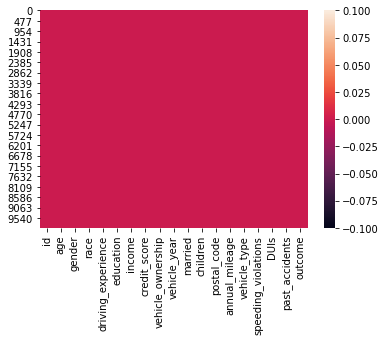

In [19]:
sns.heatmap(df.isnull())
plt.show()

In [20]:
# Check correlation
df.corr()

,id,credit_score,vehicle_ownership,married,children,postal_code,annual_mileage,speeding_violations,DUIs,past_accidents,outcome
id,1.000000,0.001416,0.009197,0.014826,0.001233,0.006038,-0.002111,0.008156,0.009268,0.001831,-0.010506
credit_score,0.001416,1.000000,0.295310,0.266744,0.209448,0.008759,-0.157530,0.194658,0.120966,0.172008,-0.308998
vehicle_ownership,0.009197,0.295310,1.000000,0.175626,0.125990,-0.004866,-0.092701,0.133868,0.086567,0.119521,-0.378921
married,0.014826,0.266744,0.175626,1.000000,0.287009,0.012045,-0.439520,0.218855,0.120840,0.215269,-0.262104
children,0.001233,0.209448,0.125990,0.287009,1.000000,0.020911,-0.425813,0.220415,0.115354,0.206295,-0.232835
postal_code,0.006038,0.008759,-0.004866,0.012045,0.020911,1.000000,-0.127286,0.113686,0.038492,-0.116985,0.095889
annual_mileage,-0.002111,-0.157530,-0.092701,-0.439520,-0.425813,-0.127286,1.000000,-0.308125,-0.111232,-0.187180,0.177575
speeding_violations,0.008156,0.194658,0.133868,0.218855,0.220415,0.113686,-0.308125,1.000000,0.359838,0.443074,-0.291862
DUIs,0.009268,0.120966,0.086567,0.120840,0.115354,0.038492,-0.111232,0.359838,1.000000,0.259359,-0.189352
past_accidents,0.001831,0.172008,0.119521,0.215269,0.206295,-0.116985,-0.187180,0.443074,0.259359,1.000000,-0.311495


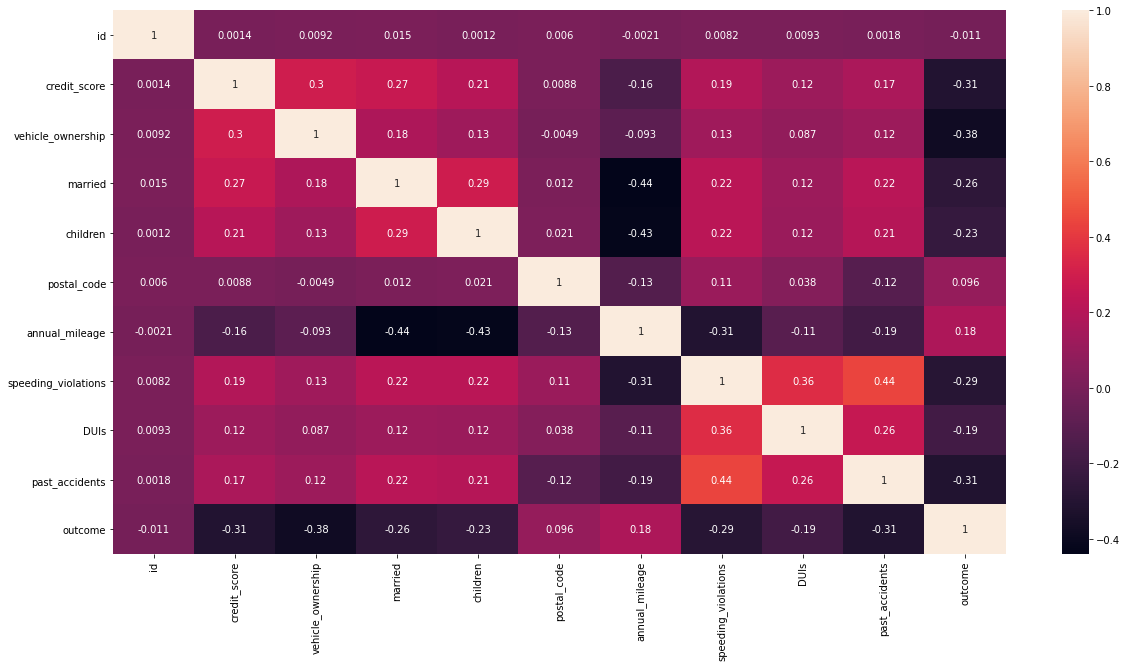

In [21]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True)

In [22]:
#seprate the categorical columns and numerical columns
cat_df, num_df = [], []
for i in df:
    if df[i].dtypes=='object':
        cat_df.append(i)
    elif (df[i].dtypes=='int') | (df[i].dtypes=='float') | (df[i].dtypes=='int64'):
        num_df.append(i)
    else: print('Others >', i)
print('>>> Total Number of Features ::', df.shape[1])
print('>>> Number of Categorical Features ::', len(cat_df))
print('>>> Number of Numerical Features ::', len(num_df))

>>> Total Number of Features :: 19
>>> Number of Categorical Features :: 8
>>> Number of Numerical Features :: 11


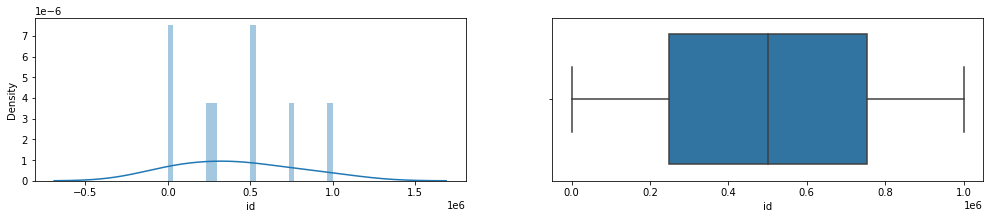

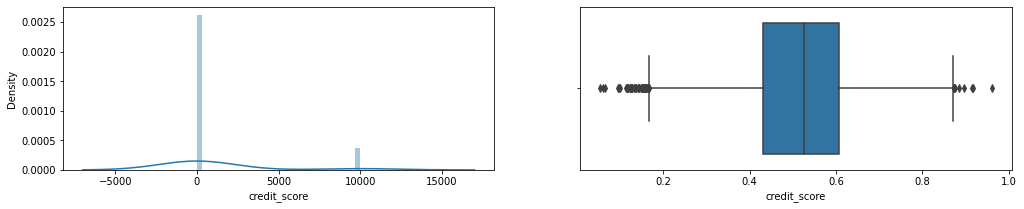

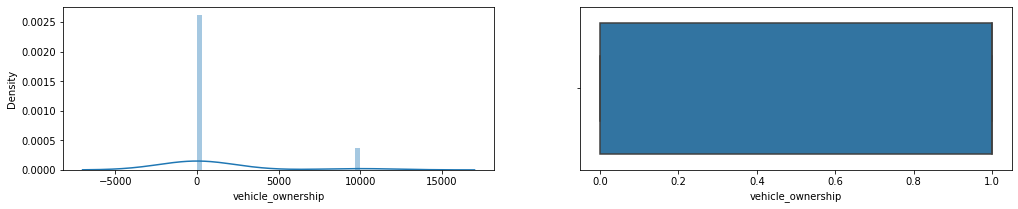

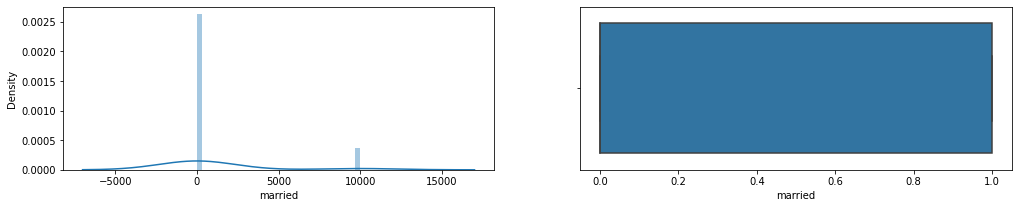

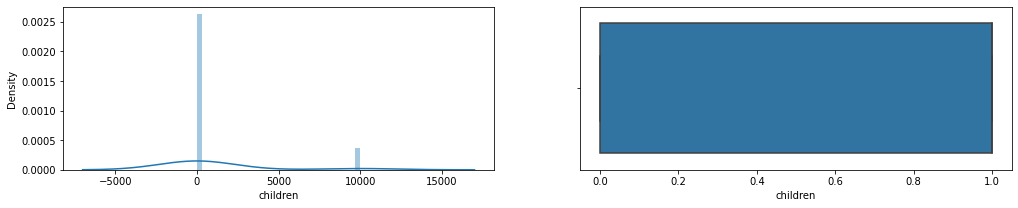

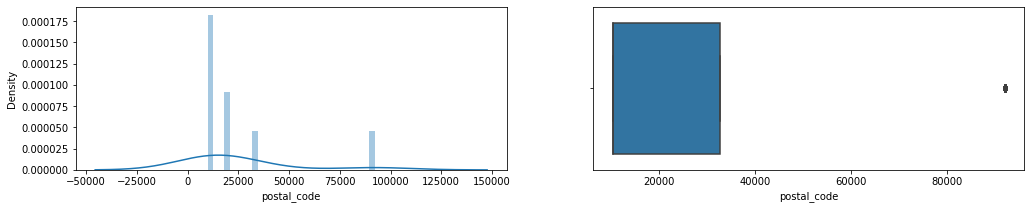

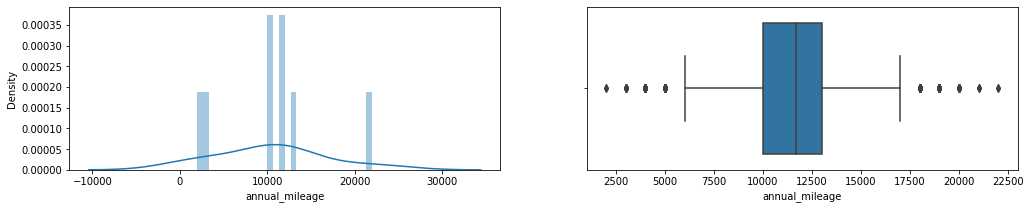

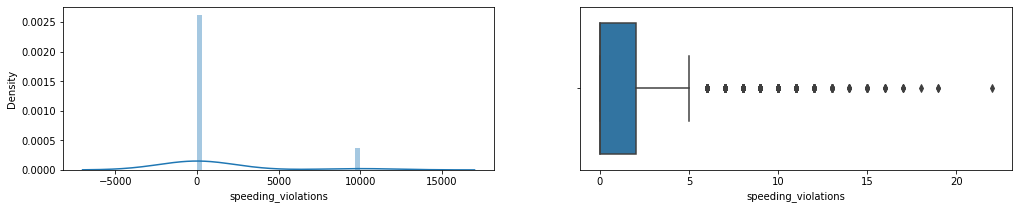

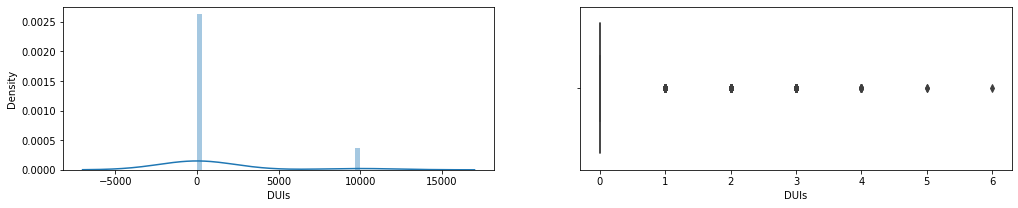

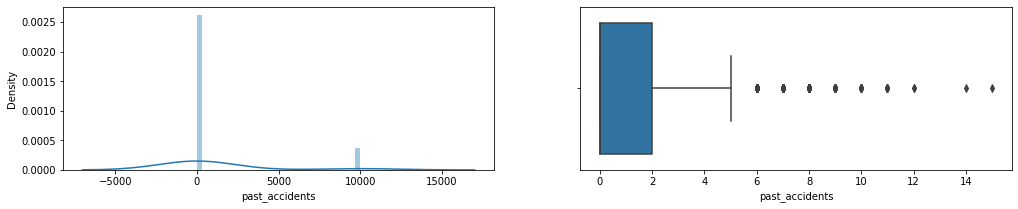

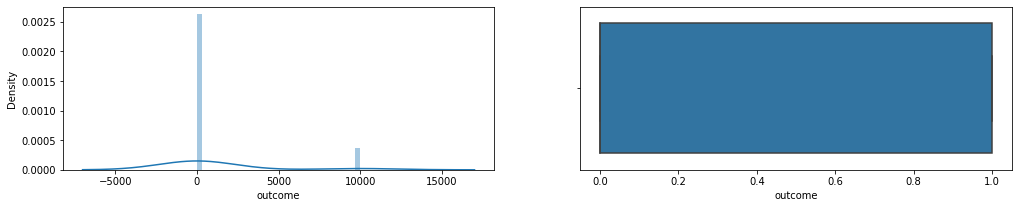

In [23]:
#Univariate analysis of numerical features
for i in num_df:
    f=plt.figure(figsize=(17,3))
    f.add_subplot(1,2,1)
    sns.distplot(df[i].describe(),bins=30)
    f.add_subplot(1,2,2)
    sns.boxplot(df[i])

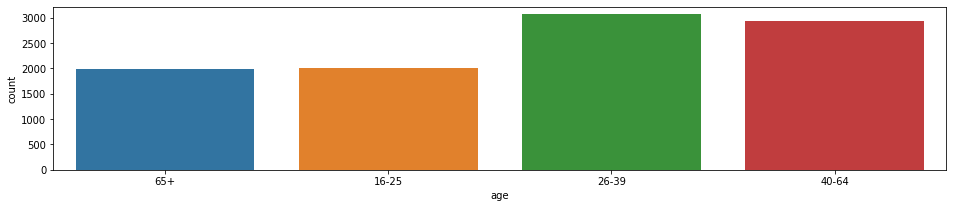

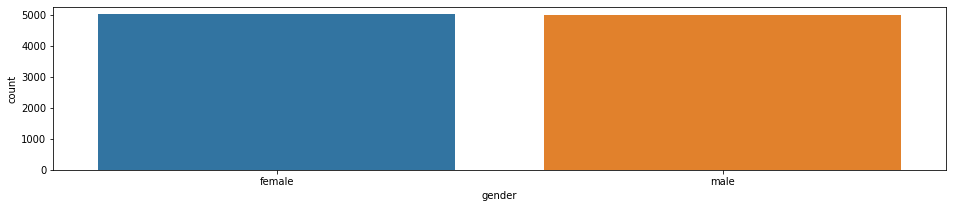

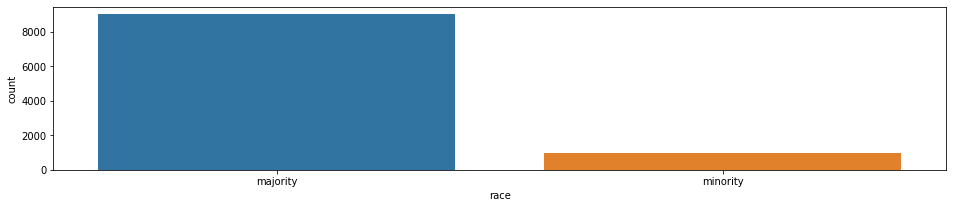

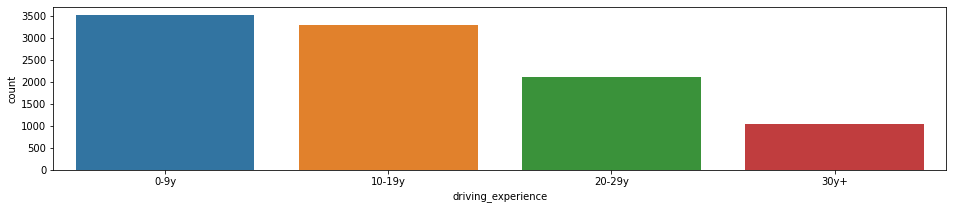

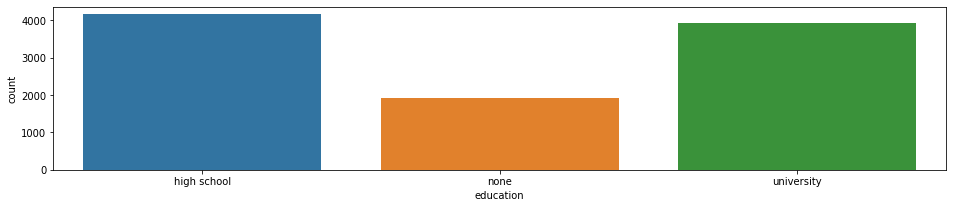

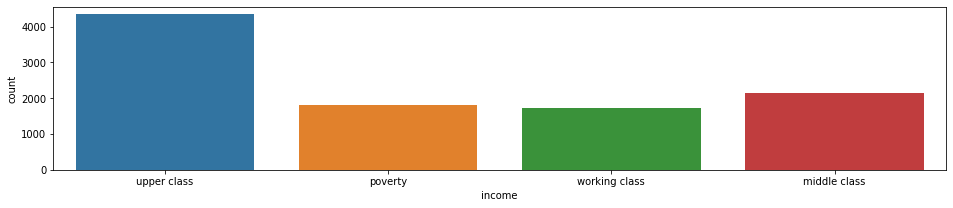

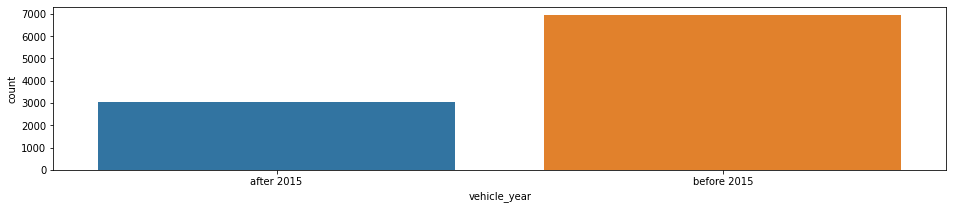

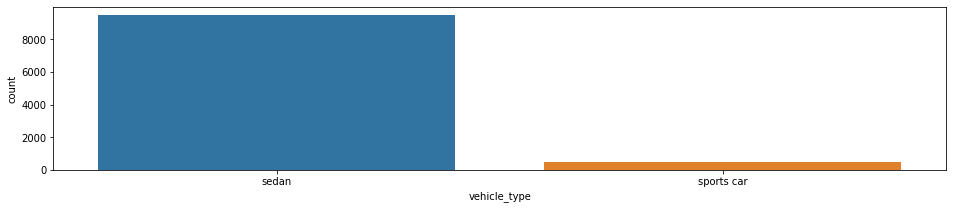

In [24]:
#Univariate analysis of categorical features
for i in cat_df:
    f=plt.figure(figsize=(16,3))
    f.add_subplot(1,1,1)
    sns.countplot(df[i])

In [25]:
print('>>>> # of unique values in df <<<<')
for i in df:
    print(i, '--->', df[i].nunique())

>>>> # of unique values in df <<<<
id ---> 10000
age ---> 4
gender ---> 2
race ---> 2
driving_experience ---> 4
education ---> 3
income ---> 4
credit_score ---> 9019
vehicle_ownership ---> 2
vehicle_year ---> 2
married ---> 2
children ---> 2
postal_code ---> 4
annual_mileage ---> 22
vehicle_type ---> 2
speeding_violations ---> 21
DUIs ---> 7
past_accidents ---> 15
outcome ---> 2


In [26]:
df['age'].value_counts()

26-39    3063
40-64    2931
16-25    2016
65+      1990
Name: age, dtype: int64

In [27]:
df['age'].replace({'16-25':'0','26-39':'1','40-64':'2','65+':'3'},inplace=True)
df['age'].value_counts()

1    3063
2    2931
0    2016
3    1990
Name: age, dtype: int64

In [28]:
df['gender'].value_counts()

female    5010
male      4990
Name: gender, dtype: int64

In [29]:
df['gender'].replace({'female':'0','male':'1'},inplace=True)
df['gender'].value_counts()

0    5010
1    4990
Name: gender, dtype: int64

In [30]:
df['race'].value_counts()

majority    9012
minority     988
Name: race, dtype: int64

In [31]:
df['race'].replace({'minority':'0','majority':'1'},inplace=True)
df['race'].value_counts()

1    9012
0     988
Name: race, dtype: int64

In [32]:
df['driving_experience'].value_counts()

0-9y      3530
10-19y    3299
20-29y    2119
30y+      1052
Name: driving_experience, dtype: int64

In [33]:
df['driving_experience'].replace({'0-9y':'0','10-19y':'1','20-29y':'2','30y+':'3'},inplace=True)
df['driving_experience'].value_counts()

0    3530
1    3299
2    2119
3    1052
Name: driving_experience, dtype: int64

In [34]:
df['education'].value_counts()

high school    4157
university     3928
none           1915
Name: education, dtype: int64

In [35]:
df['education'].replace({'none':'0','high school':'1','university':'2'},inplace=True)
df['education'].value_counts()

1    4157
2    3928
0    1915
Name: education, dtype: int64

In [36]:
df['income'].value_counts()

upper class      4336
middle class     2138
poverty          1814
working class    1712
Name: income, dtype: int64

In [37]:
df['income'].replace({'poverty':'0','working class':'1','middle class':'2','upper class':'3'},inplace=True)
df['income'].value_counts()

3    4336
2    2138
0    1814
1    1712
Name: income, dtype: int64

In [38]:
df['vehicle_ownership'].value_counts()

1    6970
0    3030
Name: vehicle_ownership, dtype: int64

In [39]:
df['vehicle_year'].value_counts()

before 2015    6967
after 2015     3033
Name: vehicle_year, dtype: int64

In [40]:
df['vehicle_year'].replace({'before 2015':'0','after 2015':'1'},inplace=True)
df['vehicle_year'].value_counts()

0    6967
1    3033
Name: vehicle_year, dtype: int64

In [41]:
df['vehicle_type'].value_counts()

sedan         9523
sports car     477
Name: vehicle_type, dtype: int64

In [42]:
df['vehicle_type'].replace({'sports car':'0','sedan':'1'},inplace=True)
df['vehicle_type'].value_counts()

1    9523
0     477
Name: vehicle_type, dtype: int64

In [43]:
df['outcome'].value_counts()

0    6867
1    3133
Name: outcome, dtype: int64

In [44]:
df.head()

,id,age,gender,race,driving_experience,education,income,credit_score,vehicle_ownership,vehicle_year,married,children,postal_code,annual_mileage,vehicle_type,speeding_violations,DUIs,past_accidents,outcome
0,569520,3,0,1,0,1,3,0.629027,1,1,0,1,10238,12000.0,1,0,0,0,0
1,750365,0,1,1,0,0,0,0.357757,0,0,0,0,10238,16000.0,1,0,0,0,1
2,199901,0,0,1,0,1,1,0.493146,1,0,0,0,10238,11000.0,1,0,0,0,0
3,478866,0,1,1,0,2,1,0.206013,1,0,0,1,32765,11000.0,1,0,0,0,0
4,731664,1,1,1,1,0,1,0.388366,1,0,0,0,32765,12000.0,1,2,0,1,1


In [45]:
# Ans1. What proportion of customers with a credit score below 0.2 made a claim in the last year?

claim=df[df['outcome']==1]
not_claim=df[df['outcome']==0]

In [46]:
print(claim.shape,not_claim.shape)

(3133, 19) (6867, 19)


In [47]:
claim.head()

,id,age,gender,race,driving_experience,education,income,credit_score,vehicle_ownership,vehicle_year,married,children,postal_code,annual_mileage,vehicle_type,speeding_violations,DUIs,past_accidents,outcome
1,750365,0,1,1,0,0,0,0.357757,0,0,0,0,10238,16000.0,1,0,0,0,1
4,731664,1,1,1,1,0,1,0.388366,1,0,0,0,32765,12000.0,1,2,0,1,1
7,461006,1,0,1,0,2,1,0.468689,0,1,0,1,10238,14000.0,1,0,0,0,1
9,445911,2,0,1,0,1,3,0.561531,1,0,0,1,32765,11000.0,1,0,0,0,1
17,24851,0,1,1,0,0,0,0.525033,0,0,1,0,32765,12000.0,1,0,0,0,1


In [48]:
credit_score=claim[claim['credit_score']<0.2]

In [49]:
credit_score.head()

,id,age,gender,race,driving_experience,education,income,credit_score,vehicle_ownership,vehicle_year,married,children,postal_code,annual_mileage,vehicle_type,speeding_violations,DUIs,past_accidents,outcome
187,431538,0,1,1,0,1,0,0.194150,0,0,1,0,10238,12000.0,0,0,0,0,1
210,112143,0,0,1,0,0,1,0.192427,0,0,0,1,32765,11000.0,1,0,0,0,1
279,124204,0,0,1,0,0,0,0.186185,0,0,0,0,10238,17000.0,1,0,0,0,1
294,232470,0,1,1,0,2,0,0.126453,1,0,0,1,10238,14000.0,1,0,0,0,1
880,66528,1,1,0,1,0,0,0.190250,0,0,0,1,10238,11000.0,1,0,0,1,1


In [50]:
credit_score.shape

(59, 19)

In [51]:
(59/10000)*100

0.59

## Deep Learning algorithm

In [52]:
# Transform Non numeric columns into Numeric columns

from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()

for column in df.columns:
    if df[column].dtype==np.number:
        continue
    df[column]=le.fit_transform(df[column])

In [53]:
#Splitting the data into input and output variable.
X=df.drop(columns=['outcome'],axis=1)
X.head()

,id,age,gender,race,driving_experience,education,income,credit_score,vehicle_ownership,vehicle_year,married,children,postal_code,annual_mileage,vehicle_type,speeding_violations,DUIs,past_accidents
0,5691,3,0,1,0,1,3,0.629027,1,1,0,1,0,12000.0,1,0,0,0
1,7466,0,1,1,0,0,0,0.357757,0,0,0,0,0,16000.0,1,0,0,0
2,2009,0,0,1,0,1,1,0.493146,1,0,0,0,0,11000.0,1,0,0,0
3,4775,0,1,1,0,2,1,0.206013,1,0,0,1,2,11000.0,1,0,0,0
4,7258,1,1,1,1,0,1,0.388366,1,0,0,0,2,12000.0,1,2,0,1


In [54]:
y=df['outcome']
y.head()

0    0
1    1
2    0
3    0
4    1
Name: outcome, dtype: int64

In [55]:
# Splitting the dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .20, random_state=42)

In [56]:
len(X_train), len(X_test), len(y_train), len(y_test)

(8000, 2000, 8000, 2000)

In [57]:
# Scaling the data before feeding the model
from sklearn.preprocessing import StandardScaler
scaler_train = StandardScaler()
X_train = scaler_train.fit_transform(X_train)

scaler_test = StandardScaler()
X_test = scaler_test.fit_transform(X_test)

In [58]:
# Importing the tensorflow library
import tensorflow as tf
print(tf.__version__)

2.5.0


In [59]:
# Let's create a model to fit on the training data and evaluate on the testing data

# Set random seed
tf.random.set_seed(42)

# 1. Create a model 
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer = tf.keras.optimizers.Adam(lr=0.01),
              metrics=['accuracy'])

# 3. Fit the model
history = model.fit(X_train, y_train, epochs= 30)

Epoch 1/30
250/250 [==============================] - 1s 877us/step - loss: 0.3777 - accuracy: 0.8284
Epoch 2/30
250/250 [==============================] - 0s 1ms/step - loss: 0.3500 - accuracy: 0.8446
Epoch 3/30
250/250 [==============================] - 0s 933us/step - loss: 0.3452 - accuracy: 0.8446
Epoch 4/30
250/250 [==============================] - 0s 891us/step - loss: 0.3427 - accuracy: 0.8478
Epoch 5/30
250/250 [==============================] - 0s 899us/step - loss: 0.3409 - accuracy: 0.8456
Epoch 6/30
250/250 [==============================] - 0s 882us/step - loss: 0.3370 - accuracy: 0.8501
Epoch 7/30
250/250 [==============================] - 0s 860us/step - loss: 0.3343 - accuracy: 0.8440
Epoch 8/30
250/250 [==============================] - 0s 869us/step - loss: 0.3322 - accuracy: 0.8501
Epoch 9/30
250/250 [==============================] - 0s 935us/step - loss: 0.3301 - accuracy: 0.8456
Epoch 10/30
250/250 [==============================] - 0s 900us/step - loss: 0.3265 

In [60]:
# Evaluate the model on the test dataset
model.evaluate(X_test, y_test)

63/63 [==============================] - 0s 665us/step - loss: 0.3550 - accuracy: 0.8365


[0.35502007603645325, 0.8364999890327454]

Text(0.5, 1.0, 'Model loss curves')

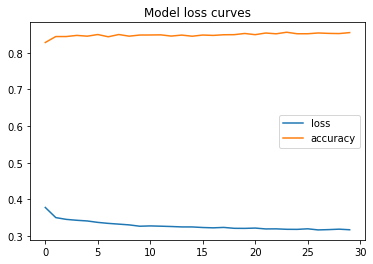

In [61]:
# Plot the loss curves
pd.DataFrame(history.history).plot()
plt.title("Model loss curves")

In [62]:
# Let's create a model to fit on the training data and evaluate on the testing data

# Set random seed
tf.random.set_seed(42)

# 1. Create a model 
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# 2. Compile the model
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer = tf.keras.optimizers.Adam(),
              metrics=['accuracy'])

# Create a learning rate callback
lr_schedular = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * (10**(epoch/20)))

# 3. Fit the model
history_1 = model_1.fit(X_train, 
                      y_train,
                      validation_data = (X_test, y_test),
                      batch_size = 32,
                      epochs = 80,
                      callbacks=[lr_schedular])

Epoch 1/80
250/250 [==============================] - 1s 2ms/step - loss: 0.6477 - accuracy: 0.6423 - val_loss: 0.6080 - val_accuracy: 0.6850
Epoch 2/80
250/250 [==============================] - 0s 1ms/step - loss: 0.5652 - accuracy: 0.7078 - val_loss: 0.5376 - val_accuracy: 0.7385
Epoch 3/80
250/250 [==============================] - 0s 1ms/step - loss: 0.5000 - accuracy: 0.7666 - val_loss: 0.4845 - val_accuracy: 0.7800
Epoch 4/80
250/250 [==============================] - 0s 1ms/step - loss: 0.4523 - accuracy: 0.7964 - val_loss: 0.4487 - val_accuracy: 0.7915
Epoch 5/80
250/250 [==============================] - 0s 972us/step - loss: 0.4203 - accuracy: 0.8092 - val_loss: 0.4266 - val_accuracy: 0.8055
Epoch 6/80
250/250 [==============================] - 0s 1ms/step - loss: 0.4009 - accuracy: 0.8175 - val_loss: 0.4141 - val_accuracy: 0.8125
Epoch 7/80
250/250 [==============================] - 0s 1ms/step - loss: 0.3889 - accuracy: 0.8217 - val_loss: 0.4060 - val_accuracy: 0.8110
Epoc

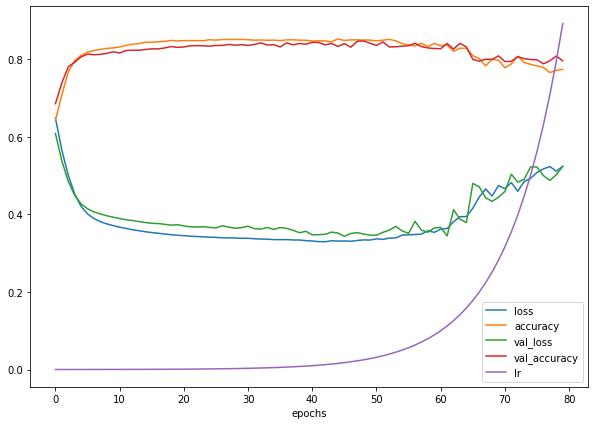

In [63]:
# Check the history
pd.DataFrame(history_1.history).plot(figsize=(10, 7), xlabel="epochs")

Text(0.5, 1.0, 'Learning rate vs Loss')

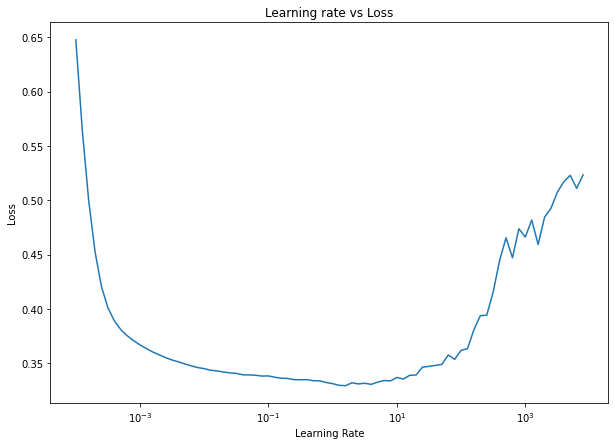

In [64]:
# Plot the learning rate versus the loss
lrs = 1e-4 * (10 ** (tf.range(80)/10))
plt.figure(figsize=(10,7))
plt.semilogx(lrs, history_1.history["loss"])
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning rate vs Loss")

# Let's Build our Final Model with our Learning rate

In [65]:
#  Let's try using a higher ideal learning rate with the same model as before

# Set random seed
tf.random.set_seed(42)

# 1. Create a model 
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# 2. Compile the model
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer = tf.keras.optimizers.Adam(lr=0.01),
              metrics=['accuracy'])

# 3. Fit the model
history_2 = model_2.fit(X_train, y_train, 
                      validation_data = (X_test, y_test) ,
                      batch_size = 12,
                      epochs= 12)

Epoch 1/12
667/667 [==============================] - 1s 1ms/step - loss: 0.3741 - accuracy: 0.8301 - val_loss: 0.3647 - val_accuracy: 0.8400
Epoch 2/12
667/667 [==============================] - 1s 1ms/step - loss: 0.3500 - accuracy: 0.8451 - val_loss: 0.3634 - val_accuracy: 0.8470
Epoch 3/12
667/667 [==============================] - 1s 1ms/step - loss: 0.3479 - accuracy: 0.8406 - val_loss: 0.3621 - val_accuracy: 0.8350
Epoch 4/12
667/667 [==============================] - 1s 1ms/step - loss: 0.3421 - accuracy: 0.8436 - val_loss: 0.3537 - val_accuracy: 0.8445
Epoch 5/12
667/667 [==============================] - 1s 1ms/step - loss: 0.3403 - accuracy: 0.8441 - val_loss: 0.3825 - val_accuracy: 0.8355
Epoch 6/12
667/667 [==============================] - 1s 1ms/step - loss: 0.3357 - accuracy: 0.8471 - val_loss: 0.3527 - val_accuracy: 0.8450
Epoch 7/12
667/667 [==============================] - 1s 1ms/step - loss: 0.3330 - accuracy: 0.8457 - val_loss: 0.3480 - val_accuracy: 0.8435
Epoch 

In [66]:
# Evaluate model 2 on the test dataset
model_2.evaluate(X_test, y_test)

63/63 [==============================] - 0s 739us/step - loss: 0.3463 - accuracy: 0.8410


[0.3462928235530853, 0.8410000205039978]

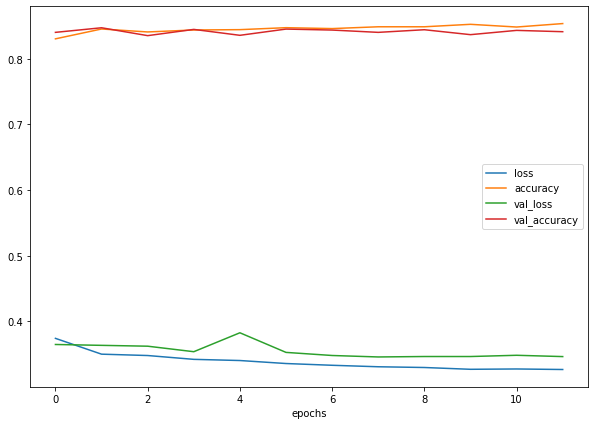

In [67]:
# Check the history
pd.DataFrame(history_2.history).plot(figsize=(10, 7), xlabel="epochs")

In [68]:
# Create a confusion matrix
from sklearn.metrics import confusion_matrix

# Make prediction
y_preds = model_2.predict(X_test)

# Create confusion matrix
confusion_matrix(y_test, tf.round(y_preds))

array([[1225,  142],
       [ 176,  457]])

In [69]:
# clssification report 
from sklearn.metrics import classification_report
print(classification_report(y_test, tf.round(y_preds)))

              precision    recall  f1-score   support

           0       0.87      0.90      0.89      1367
           1       0.76      0.72      0.74       633

    accuracy                           0.84      2000
   macro avg       0.82      0.81      0.81      2000
weighted avg       0.84      0.84      0.84      2000



In [70]:
# F1 Score
from sklearn.metrics import f1_score
f1_score(y_test, tf.round(y_preds))

0.7418831168831168

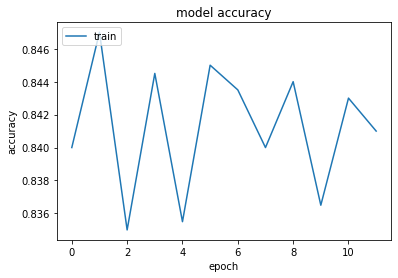

In [71]:
# ploating model accuracy
plt.plot(history_2.history['val_accuracy'])

plt.title("model accuracy")

plt.ylabel('accuracy')
plt.xlabel("epoch")
plt.legend(['train'], loc='upper left')

plt.show()

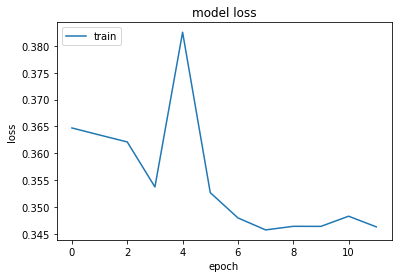

In [72]:
# ploating model loss
plt.plot(history_2.history['val_loss'])

plt.title("model loss")

plt.ylabel('loss')
plt.xlabel("epoch")
plt.legend(['train'],loc='upper left')

plt.show()